In [17]:
import os
import torch
import torchaudio
import pandas as pd
import tqdm as notebook_tqdm
import matplotlib.pyplot as plt

from dataset.anuraset import AnuraSet
from torch.utils.data import Dataset


In [4]:
audio_sample_path = "data/BuildDataset/datasetv2-multiclass_1/audio/SAMPLE_00000_INCT20955_BOAFAB_F_FOLD_4.wav"
signal, sr = torchaudio.load(audio_sample_path)

In [3]:
audio_dir = "data/BuildDataset/datasetv2-multiclass_1/audio/"

In [4]:
from os import listdir
from os.path import isfile, join
audio_files = [f for f in listdir(audio_dir) if isfile(join(audio_dir, f))]

In [5]:
"""for sample in audio_files:
    signal, sr = torchaudio.load(os.path.join(audio_dir,sample))
    if signal.shape[1] != 66150:
        print(sample, signal.shape[1])"""

In [7]:
df = pd.read_csv('data/BuildDataset/datasetv2-multiclass_1/df_train_test_files.csv')

In [8]:
print(len(df['classID'].unique()))
class_mapping = dict(zip(df['class'].value_counts().index,
                            range(len(df['class'].unique()))))
                            


18


In [11]:
#df.insert(loc=9, column='classID', value=df['class'].map(class_mapping))
#df.to_csv('data/BuildDataset/datasetv2-multiclass_1/df_train_test_files.csv', index=False)

In [2]:
ANNOTATIONS_FILE = "data/BuildDataset/datasetv2-multiclass_1/df_train_test_files.csv"
AUDIO_DIR = "data/BuildDataset/datasetv2-multiclass_1/audio"
SAMPLE_RATE = 22050
NUM_SAMPLES = 66150
DATASET_SUBSET = 'train'
VALIDATION_FOLD = 1

if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"
print(f"Using device {device}")

mel_spectrogram = torchaudio.transforms.MelSpectrogram(
    sample_rate=SAMPLE_RATE,
    n_fft=1024,
    hop_length=512,
    n_mels=64
)

Using device cuda


In [10]:
for VALIDATION_FOLD in range(6):
    DATASET_SUBSET = 'train'
    #VALIDATION_FOLD = 1
    print('VALIDATION FOLD:', VALIDATION_FOLD)

    anurasetv2 = AnuraSet(ANNOTATIONS_FILE, 
                            AUDIO_DIR, 
                            mel_spectrogram,
                            SAMPLE_RATE,
                            NUM_SAMPLES,
                            DATASET_SUBSET,
                            'cpu',
                            VALIDATION_FOLD,
                            )
    print(f"There are {len(anurasetv2)} samples in the dataset.")

    signal, label = anurasetv2[0]

    print(anurasetv2.annotations['fold'].unique())

VALIDATION FOLD: 0
There are 11566 samples in the dataset.
[4 3 2 1 5]
VALIDATION FOLD: 1
There are 9242 samples in the dataset.
[4 3 2 5]
VALIDATION FOLD: 2
There are 9273 samples in the dataset.
[4 3 1 5]
VALIDATION FOLD: 3
There are 9261 samples in the dataset.
[4 2 1 5]
VALIDATION FOLD: 4
There are 9242 samples in the dataset.
[3 2 1 5]
VALIDATION FOLD: 5
There are 9246 samples in the dataset.
[4 3 2 1]


In [24]:
df[df['fold']!=None].shape

(13874, 31)

In [25]:
df.shape

(13874, 31)

In [5]:
df = pd.read_csv(ANNOTATIONS_FILE)
df.head()

,sample_name,fname,min_t,max_t,label,species,quality,site,date,classID,...,INCT41_BOALUN_F,INCT41_BOALUN_M,INCT41_DENCRU_F,INCT41_DENCRU_M,INCT41_PHYCUV_F,INCT41_PHYCUV_M,INCT41_PHYMAR_F,INCT41_PHYMAR_M,INCT41_PITAZU_F,INCT41_PITAZU_M
0,SAMPLE_00000_INCT20955_BOAFAB_F_FOLD_4.wav,INCT20955_20190930_210000,14,17,BOAFAB_F,BOAFAB,F,INCT20955,2019-09-30 21:00:00,8,...,0,0,0,0,0,0,0,0,0,0
1,SAMPLE_00001_INCT20955_BOAFAB_F_FOLD_4.wav,INCT20955_20190930_210000,20,23,BOAFAB_F,BOAFAB,F,INCT20955,2019-09-30 21:00:00,8,...,0,0,0,0,0,0,0,0,0,0
2,SAMPLE_00002_INCT20955_BOAFAB_F_FOLD_4.wav,INCT20955_20190930_210000,25,28,BOAFAB_F,BOAFAB,F,INCT20955,2019-09-30 21:00:00,8,...,0,0,0,0,0,0,0,0,0,0
3,SAMPLE_00003_INCT20955_BOAFAB_F_FOLD_4.wav,INCT20955_20190930_210000,30,33,BOAFAB_F,BOAFAB,F,INCT20955,2019-09-30 21:00:00,8,...,0,0,0,0,0,0,0,0,0,0
4,SAMPLE_00004_INCT20955_BOAFAB_F_FOLD_4.wav,INCT20955_20190930_210000,33,36,BOAFAB_F,BOAFAB,F,INCT20955,2019-09-30 21:00:00,8,...,0,0,0,0,0,0,0,0,0,0


In [20]:


keywords = ['INCT20955']

In [22]:
df[df['class'].str.contains('|'.join(keywords))]['class'].unique()


array(['INCT20955_BOAFAB_F', 'INCT20955_BOAFAB_M', 'INCT20955_PHYCUV_F',
       'INCT20955_PHYCUV_M', 'INCT20955_ABSENCE'], dtype=object)

In [8]:
subclasses=[]
if subclasses:
    print('gs')

In [21]:

img, label = anurasetv2[sample_idx]

In [22]:
labels_map = {v: k for k, v in class_mapping.items()}

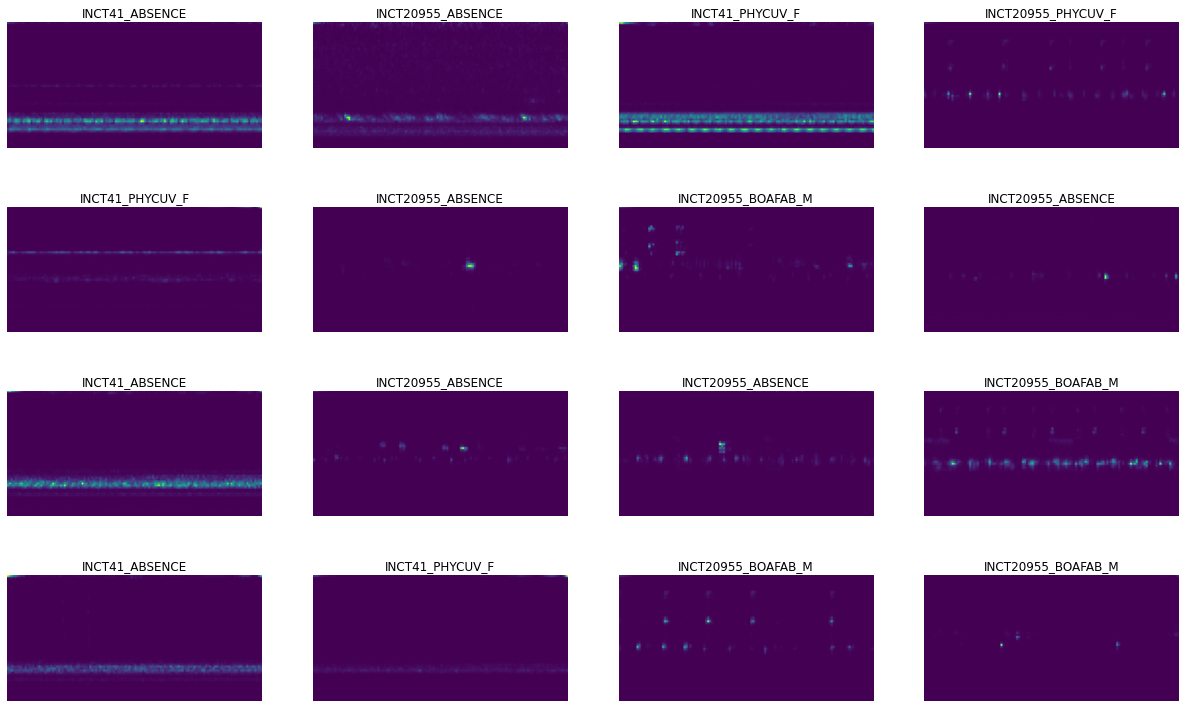

In [30]:
figure = plt.figure(figsize=(21,13))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(anurasetv2), size=(1,)).item()
    img, label = anurasetv2[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="viridis")
plt.show()

In [25]:
i

9